📖 Scraping page 1...
📖 Scraping page 2...
📖 Scraping page 3...
📖 Scraping page 4...
📖 Scraping page 5...

-//-//-//-//-//-//-//-//-//-//-//-//-//-//-//-//-//-//-//-//-//-//-//-//-//-//-//-//-//-//-//-//-//-//-//-//-//-//-//-//-//-//-//-//-//-//-//-//-//-//

Title: A Light in the Attic
Price: £51.77
Rating: Three
Availability: In stock

--------------------------------------------------

Title: Tipping the Velvet
Price: £53.74
Rating: One
Availability: In stock

--------------------------------------------------

Title: Soumission
Price: £50.1
Rating: One
Availability: In stock

--------------------------------------------------

Title: Sharp Objects
Price: £47.82
Rating: Four
Availability: In stock

--------------------------------------------------

Title: Sapiens: A Brief History of Humankind
Price: £54.23
Rating: Five
Availability: In stock

--------------------------------------------------

Title: The Requiem Red
Price: £22.65
Rating: One
Availability: In stock

------------------

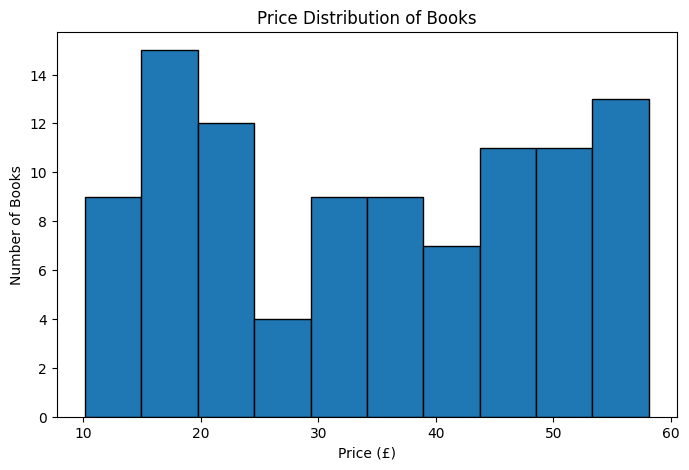

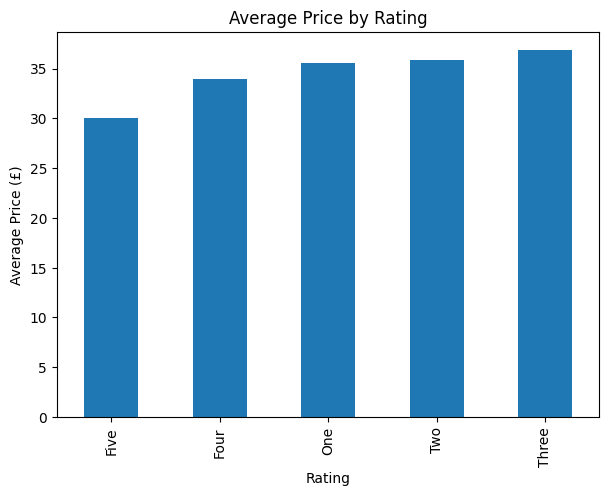

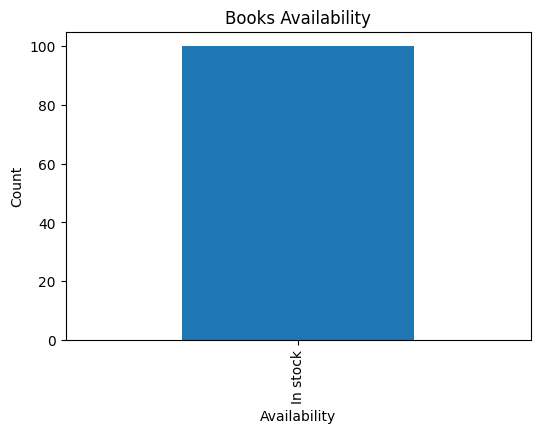


--------------------------------------------------

✅ Saved data to books_20250821_063713.xlsx


In [2]:
# ===============================
# Web Scraping Books.toscrape.com
# ===============================

import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random
import datetime
import matplotlib.pyplot as plt


# -------- Function to get books from one page --------

def get_books_from_page(url):
    books = []
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                      "AppleWebKit/537.36 (KHTML, like Gecko) "
                      "Chrome/120.0 Safari/537.36"
    }

    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print(f"❌ Failed to fetch {url} [Status: {response.status_code}]")
        return books

    soup = BeautifulSoup(response.content, "lxml")
    items = soup.find_all("article", class_="product_pod")

    for item in items:
        title = item.h3.a["title"]
        price = item.find("p", class_="price_color").text.strip()
        rating = item.p["class"][1]     # Example: "One", "Two", "Three"
        availability = item.find("p", class_="instock availability").text.strip()

        books.append({
            "Title": title,
            "Price (£)": float(price[1:]),  # remove £ sign
            "Rating": rating,
            "Availability": availability
        })
    return books



# -------- Main Scraping Loop --------

base_url = "http://books.toscrape.com/catalogue/page-{}.html"
all_books = []

for page in range(1, 6):    # scrape first 5 pages (100 books)
    url = base_url.format(page)
    print(f"📖 Scraping page {page}...")
    books = get_books_from_page(url)
    all_books.extend(books)
    time.sleep(random.uniform(1, 3))    # polite delay


print("\n" + "-//"*50 + "\n")

# -------- Print Sample Data --------

for book in all_books[:10]:     # print the first ten as a sampel
    print(f"Title: {book['Title']}")
    print(f"Price: £{book['Price (£)']}")
    print(f"Rating: {book['Rating']}")
    print(f"Availability: {book['Availability']}")
    print("\n" + "-"*50 + "\n")


# -------- Create DataFrame --------
df = pd.DataFrame(all_books)


# -------- Visualization --------

# 1. Price Distribution

plt.figure(figsize=(8,5))
plt.hist(df["Price (£)"], bins=10, edgecolor="black")
plt.title("Price Distribution of Books")
plt.xlabel("Price (£)")
plt.ylabel("Number of Books")
plt.show()


print("")

# 2. Average Price by Rating

avg_price_rating = df.groupby("Rating")["Price (£)"].mean().sort_values()
avg_price_rating.plot(kind="bar", figsize=(7,5))
plt.title("Average Price by Rating")
plt.ylabel("Average Price (£)")
plt.show()


print("")

# 3. Availability Count

availability_count = df["Availability"].value_counts()
availability_count.plot(kind="bar", figsize=(6,4))
plt.title("Books Availability")
plt.ylabel("Count")
plt.show()


print("\n" + "-"*50 + "\n")

# -------- Save to DataFrame + Excel --------

df["Timestamp"] = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

filename = f"books_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}.xlsx"
df.to_excel(filename, index=False)
print(f"✅ Saved data to {filename}")

In [4]:
df

,Title,Price (£),Rating,Availability,Timestamp
0,A Light in the Attic,51.77,Three,In stock,2025-08-21 06:37:13
1,Tipping the Velvet,53.74,One,In stock,2025-08-21 06:37:13
2,Soumission,50.10,One,In stock,2025-08-21 06:37:13
3,Sharp Objects,47.82,Four,In stock,2025-08-21 06:37:13
4,Sapiens: A Brief History of Humankind,54.23,Five,In stock,2025-08-21 06:37:13
...,...,...,...,...,...
95,Lumberjanes Vol. 3: A Terrible Plan (Lumberjan...,19.92,Two,In stock,2025-08-21 06:37:13
96,"Layered: Baking, Building, and Styling Spectac...",40.11,One,In stock,2025-08-21 06:37:13
97,Judo: Seven Steps to Black Belt (an Introducto...,53.90,Two,In stock,2025-08-21 06:37:13
98,Join,35.67,Five,In stock,2025-08-21 06:37:13
